# Final Project

# Table of contents
1. [Import packages](#section-one)
1. [Data Sourcing, Preperation, Integration](#section-two)
1. [Data Analysis](#section-three)
1. [Data Visualization](#section-four)
1. [Conclusions](#section-five)

<a id="section-one"></a>
# Import packages

In [213]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import seaborn as sns
import tensorflow as tf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

<a id="section-two"></a>
# Data Sourcing, Preperation, Integration

Stock prices are influenced by more than just historical trends; real-time events and public sentiment play a crucial role. Think about how a single tweet from Elon Musk, the onset of the COVID-19 pandemic, or geopolitical events like the Russian invasion of Ukraine can cause dramatic market shifts. To capture this dynamic, we'll use sentiment analysis on social media posts, especially from Twitter, to understand the mood of market participants and enhance our stock price predictions.

We have gathered the data from the Kaggle https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction

In [214]:
# Selecting two companies for owr analysis(Amazon and Apple)
stock1_name = 'AMZN'
stock2_name = 'AAPL'

In [215]:
# Read .csv file using pandas
all_tweets = pd.read_csv('stock_tweets.csv')

In [216]:
print(all_tweets.shape)
all_tweets.head()

(80793, 4)


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [217]:
# Selecting the tweets of the stock1_name company
df1 = all_tweets[all_tweets['Stock Name'] == stock1_name]
print(df1.shape)
df1.head()

(4089, 4)


,Date,Tweet,Stock Name,Company Name
48351,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc."
48352,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc."
48353,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc."
48354,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc."
48355,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc."


In [218]:
# Selecting the tweets of the stock2_name company
df2 = all_tweets[all_tweets['Stock Name'] == stock2_name]
print(df2.shape)
df2.head()

(5056, 4)


,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.


In [219]:
# Adding more coloums for the df1 data to find the sentiment of the tweets
sent_df1 = df1.copy()
sent_df1["sentiment_score"] = ''
sent_df1["Negative"] = ''
sent_df1["Neutral"] = ''
sent_df1["Positive"] = ''
sent_df1.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",,,,
48352,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",,,,
48353,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",,,,
48354,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",,,,
48355,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",,,,


In [220]:
# Adding more coloums for the df2 data to find the sentiment of the tweets
sent_df2 = df2.copy()
sent_df2["sentiment_score"] = ''
sent_df2["Negative"] = ''
sent_df2["Neutral"] = ''
sent_df2["Positive"] = ''
sent_df2.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,,,,
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,,,,
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,,,,
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,,,,
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,,,,


To measure sentiment scores, I used the VADER (Valence Aware Dictionary for Sentiment Reasoning) model. VADER is great for analyzing the sentiment of text, taking into account not just whether the sentiment is positive or negative, but also how strong those feelings are. This model, available through the NLTK package, can be applied directly to text data without needing any prior labeling.

VADER works by using a dictionary that links words to their emotional intensity, creating sentiment scores. It calculates the overall sentiment of a piece of text by adding up the intensity scores of each word in the text.

In [221]:
#Getting the sentiment score of the Amazon company using VADER
sentiment_analyzer = SentimentIntensityAnalyzer()

for indx, row in sent_df1.T.items():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df1.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df1.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df1.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df1.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df1.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(sent_df.loc[indx, 'Tweet'])
        print(indx)
        break


In [222]:
# Data with the sentiment score for Amazon company
sent_df1.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.25,0.158,0.684,0.158
48353,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.0,0.799,0.201


In [223]:
#Getting the sentiment score of the Apple company using VADER
sentiment_analyzer = SentimentIntensityAnalyzer()

for indx, row in sent_df2.T.items():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df2.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df2.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df2.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df2.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df2.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(sent_df.loc[indx, 'Tweet'])
        print(indx)
        break

In [224]:
# Data with the sentiment score for Apple company
sent_df2.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,0.25,0.158,0.684,0.158
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,0.3612,0.0,0.915,0.085
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,0.0,0.0,1.0,0.0
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,-0.25,0.182,0.699,0.119
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,-0.6523,0.143,0.857,0.0


In [225]:
sent_df2.describe()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
count,5056,5056,5056,5056,5056.0,5056.0,5056.0,5056.0
unique,5051,5042,1,1,976.0,301.0,437.0,369.0
top,2022-01-31 00:30:29+00:00,"$AAPL reiterated with Buy rating at UBS, price...",AAPL,Apple Inc.,0.0,0.0,1.0,0.0
freq,3,4,5056,5056,1686.0,3393.0,1676.0,2362.0


In [226]:
# Concating DataFrames 
df = pd.concat([sent_df1, sent_df2], ignore_index=True)

In [227]:
df

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
1,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.25,0.158,0.684,0.158
2,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
3,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
4,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.0,0.799,0.201
...,...,...,...,...,...,...,...,...
9140,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.,-0.4019,0.197,0.803,0.0
9141,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.,0.4767,0.0,0.892,0.108
9142,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.,0.0,0.0,1.0,0.0
9143,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.,0.2296,0.076,0.829,0.095


Downloading the datframe to .csv file for the Visualiztions in PowerBI

In [228]:
# Save DataFrame to a CSV file
df.to_csv('sentiment_analysis_data.csv', index=False)

<a id="section-three"></a>
# Data Analysis

In [229]:
# Descriptive statistics for sentiment scores by company
descriptive_stats = df.groupby('Company Name')['sentiment_score'].describe()
print("Descriptive Statistics for Sentiment Scores by Company:")
print(descriptive_stats)

Descriptive Statistics for Sentiment Scores by Company:
                   count  unique  top    freq
Company Name                                 
Amazon.com, Inc.  4089.0   915.0  0.0  1069.0
Apple Inc.        5056.0   976.0  0.0  1686.0


In [230]:
# Distribution statistics
distribution_stats = df.groupby('Company Name')['sentiment_score'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nDistribution Statistics for Sentiment Scores by Company:")
print(distribution_stats)


Distribution Statistics for Sentiment Scores by Company:
                      mean  median       std     min     max
Company Name                                                
Amazon.com, Inc.  0.184733  0.1779  0.432468 -0.9506  0.9818
Apple Inc.        0.136028     0.0  0.416824 -0.9911  0.9797


In [231]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Daily average sentiment score for each company
daily_sentiment = df.groupby(['Company Name', df['Date'].dt.date])['sentiment_score'].mean().unstack()
print("\nDaily Average Sentiment Score for Each Company:")
daily_sentiment.head()


Daily Average Sentiment Score for Each Company:


Date,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,...,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29
Company Name,,,,,,,,,,,,,,,,,,,,,
"Amazon.com, Inc.",0.24648,0.359338,-0.0007,0.8344,0.25865,0.0455,0.1943,0.2763,0.3972,0.0,...,0.084413,-0.076067,0.3594,-0.104025,0.1872,0.225867,-0.068714,-0.0967,0.39452,0.11765
Apple Inc.,0.0989,0.291891,0.007525,0.8344,0.04741,0.13906,0.19033,0.30275,0.456071,0.29545,...,0.056175,0.05322,0.223217,0.0189,0.224527,0.142021,0.2898,0.256164,-0.042374,0.018594


In [232]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Create a 'Week' column representing the start of the week
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
# Group by 'Company Name' and 'Week', then calculate the mean sentiment score
weekly_sentiment = df.groupby(['Company Name', 'Week'])['sentiment_score'].mean().unstack()
print("\nWeekly Average Sentiment Score for Each Company:")
weekly_sentiment.head()


Weekly Average Sentiment Score for Each Company:


Week,2021-09-27,2021-10-04,2021-10-11,2021-10-18,2021-10-25,2021-11-01,2021-11-08,2021-11-15,2021-11-22,2021-11-29,...,2022-07-25,2022-08-01,2022-08-08,2022-08-15,2022-08-22,2022-08-29,2022-09-05,2022-09-12,2022-09-19,2022-09-26
Company Name,,,,,,,,,,,,,,,,,,,,,
"Amazon.com, Inc.",0.290553,0.247838,0.170529,0.10926,0.106828,0.310231,0.313061,0.256251,0.289408,0.306684,...,0.183632,0.273386,0.208888,0.243272,0.250732,0.255777,0.219931,0.195346,0.150735,0.129913
Apple Inc.,0.207287,0.227676,0.200195,0.251642,0.123696,0.186968,0.238397,0.238998,0.234717,0.172481,...,0.125465,0.060831,0.093712,0.111912,0.104728,0.100056,0.048233,0.183523,0.117702,0.037055


In [233]:
# Variability in sentiment scores
sentiment_variability = df.groupby('Company Name')['sentiment_score'].std()
print("\nSentiment Score Variability by Company:")
sentiment_variability


Sentiment Score Variability by Company:


Company Name
Amazon.com, Inc.    0.432468
Apple Inc.          0.416824
Name: sentiment_score, dtype: float64

In [234]:
# Pairwise comparison of sentiment scores
comparison = df.groupby('Company Name')['sentiment_score'].mean().sort_values()
print("\nComparison of Average Sentiment Scores Between Companies:")
comparison


Comparison of Average Sentiment Scores Between Companies:


Company Name
Apple Inc.          0.136028
Amazon.com, Inc.    0.184733
Name: sentiment_score, dtype: object

<a id="section-four"></a>
# Data Visualizations

Visualizing Sentiment Distribution by Company

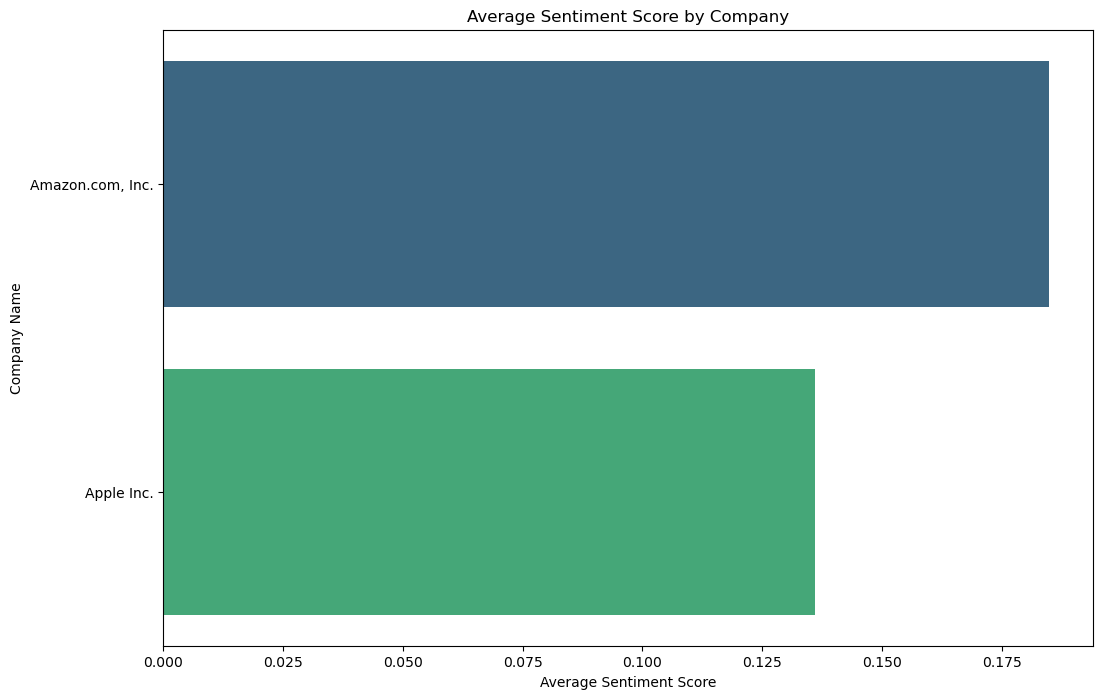

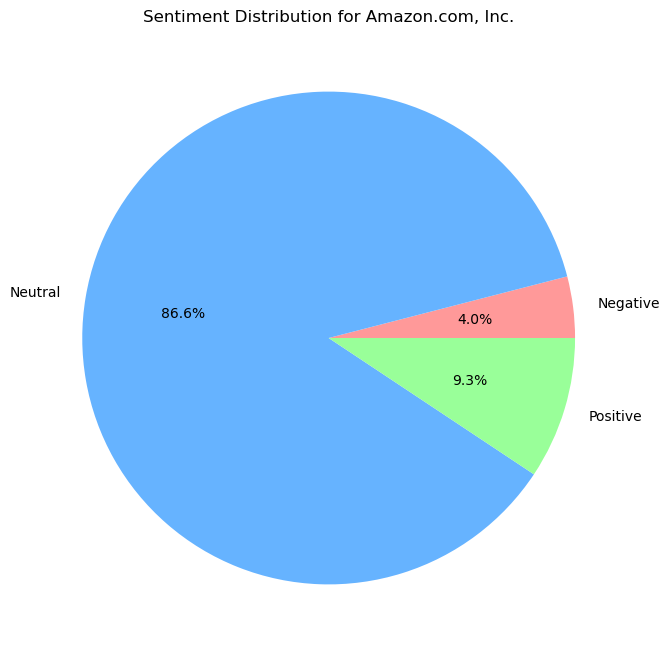

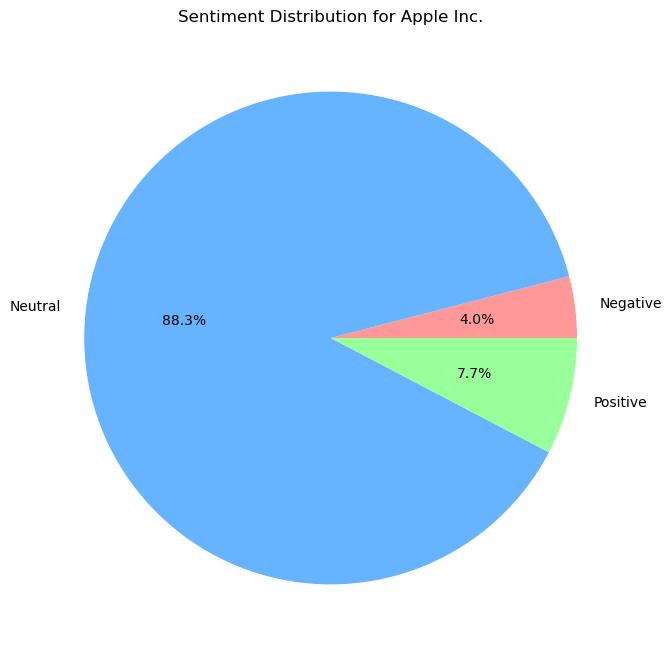

In [235]:
# Calculate average sentiment scores by company
avg_sentiment = df.groupby('Company Name')[['sentiment_score', 'Negative', 'Neutral', 'Positive']].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment_score', y='Company Name', data=avg_sentiment, palette='viridis')
plt.title('Average Sentiment Score by Company')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Company Name')
plt.show()

# Define a function to plot pie charts
def plot_pie_chart(df, company_name):
    data = df[df['Company Name'] == company_name][['Negative', 'Neutral', 'Positive']].mean()
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'Sentiment Distribution for {company_name}')
    plt.show()

# For Amazon
plot_pie_chart(avg_sentiment, 'Amazon.com, Inc.')

# For Apple
plot_pie_chart(avg_sentiment, 'Apple Inc.')

Daily Sentiment Trends

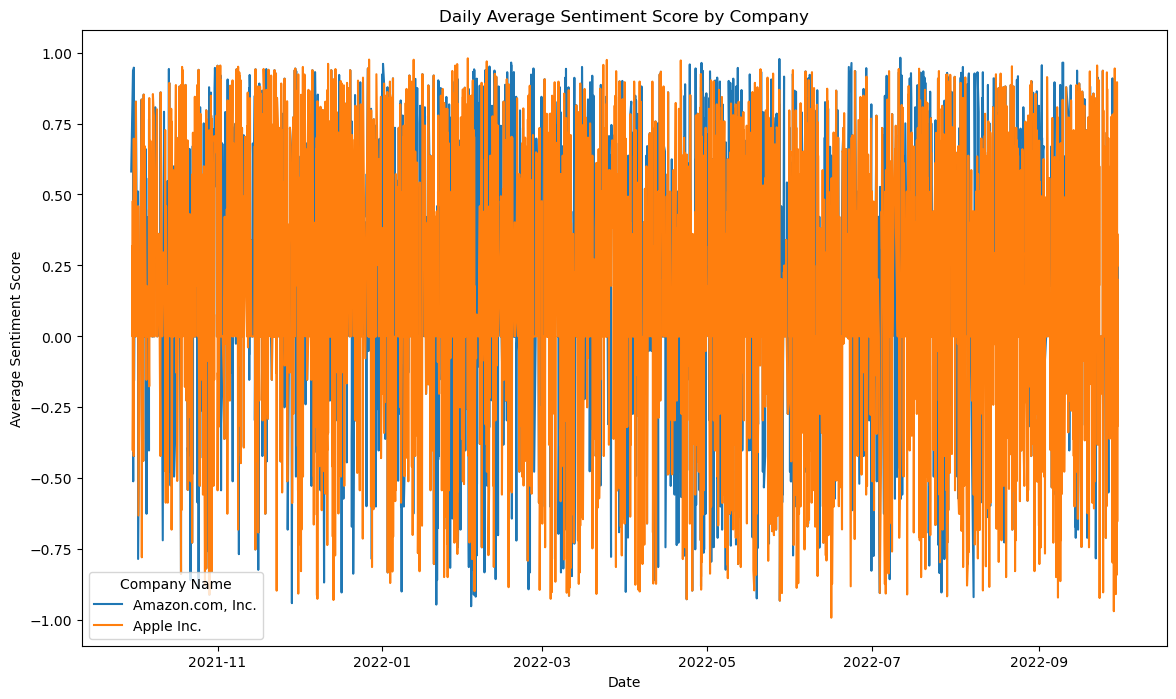

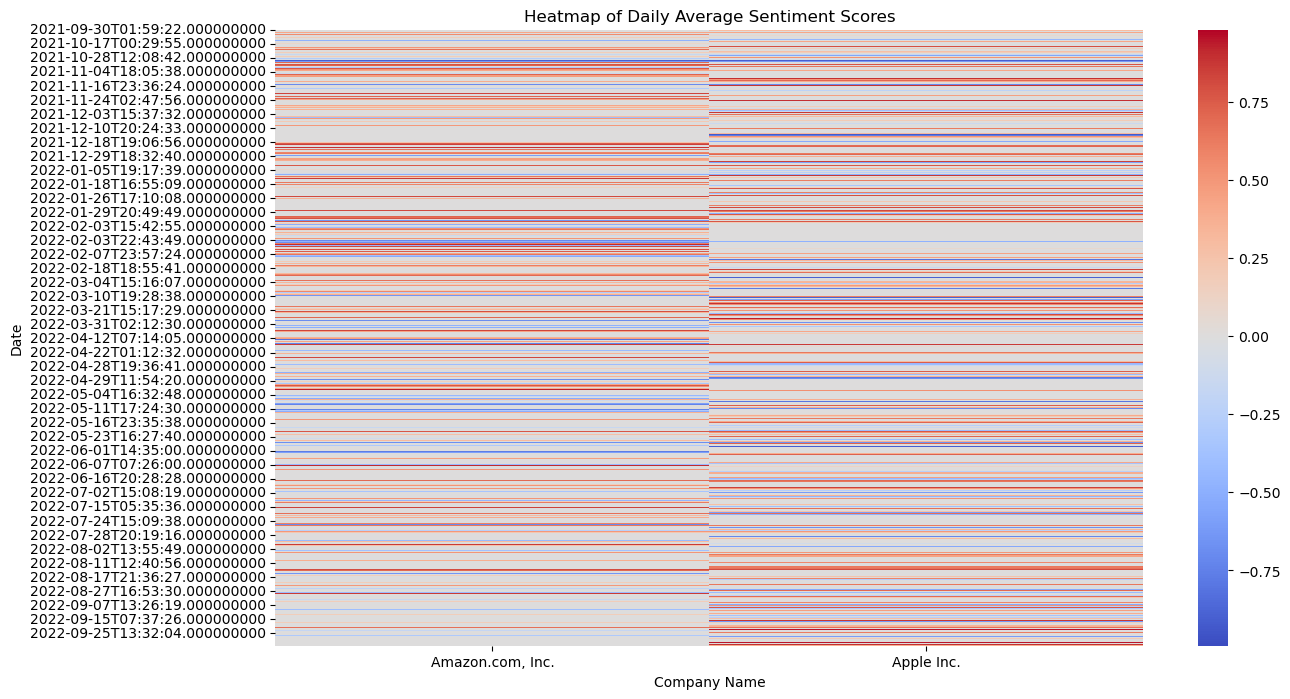

In [236]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sentiment = df.groupby(['Date', 'Company Name'])['sentiment_score'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_sentiment, x='Date', y='sentiment_score', hue='Company Name')
plt.title('Daily Average Sentiment Score by Company')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Company Name')
plt.show()


# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and 'Company Name' and calculate the mean sentiment score
daily_sentiment = df.groupby(['Date', 'Company Name'])['sentiment_score'].mean().reset_index()

# Create a pivot table for heatmap
heatmap_data = daily_sentiment.pivot(index='Date', columns='Company Name', values='sentiment_score')

# Fill missing values with 0 or another appropriate value
heatmap_data = heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Heatmap of Daily Average Sentiment Scores')
plt.xlabel('Company Name')
plt.ylabel('Date')
plt.show()


Correlation Analysis

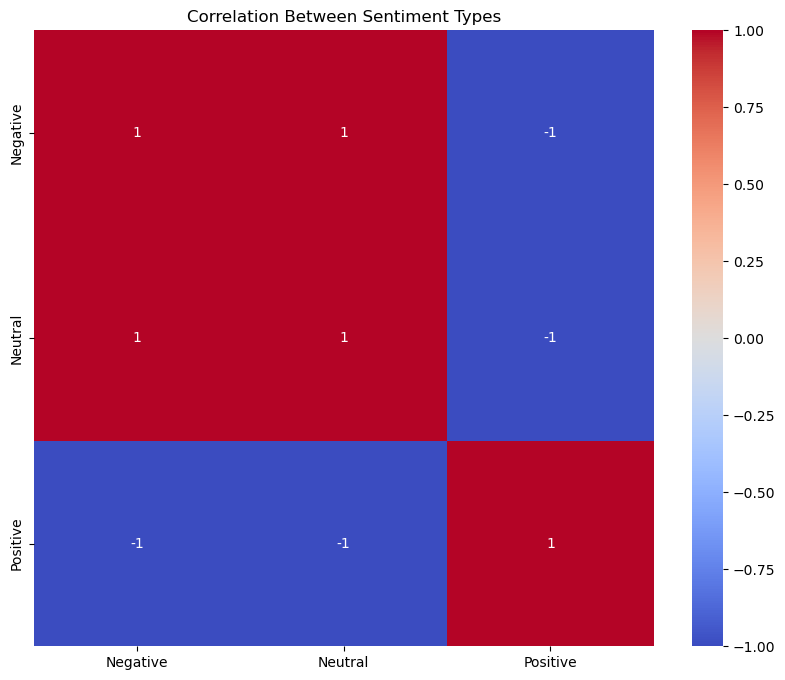

In [237]:
# Calculate average sentiment types by company
avg_sentiment_types = df.groupby('Company Name')[['Negative', 'Neutral', 'Positive']].mean()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(avg_sentiment_types.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Sentiment Types')
plt.show()



Visualizing Sentiment Trends by Company

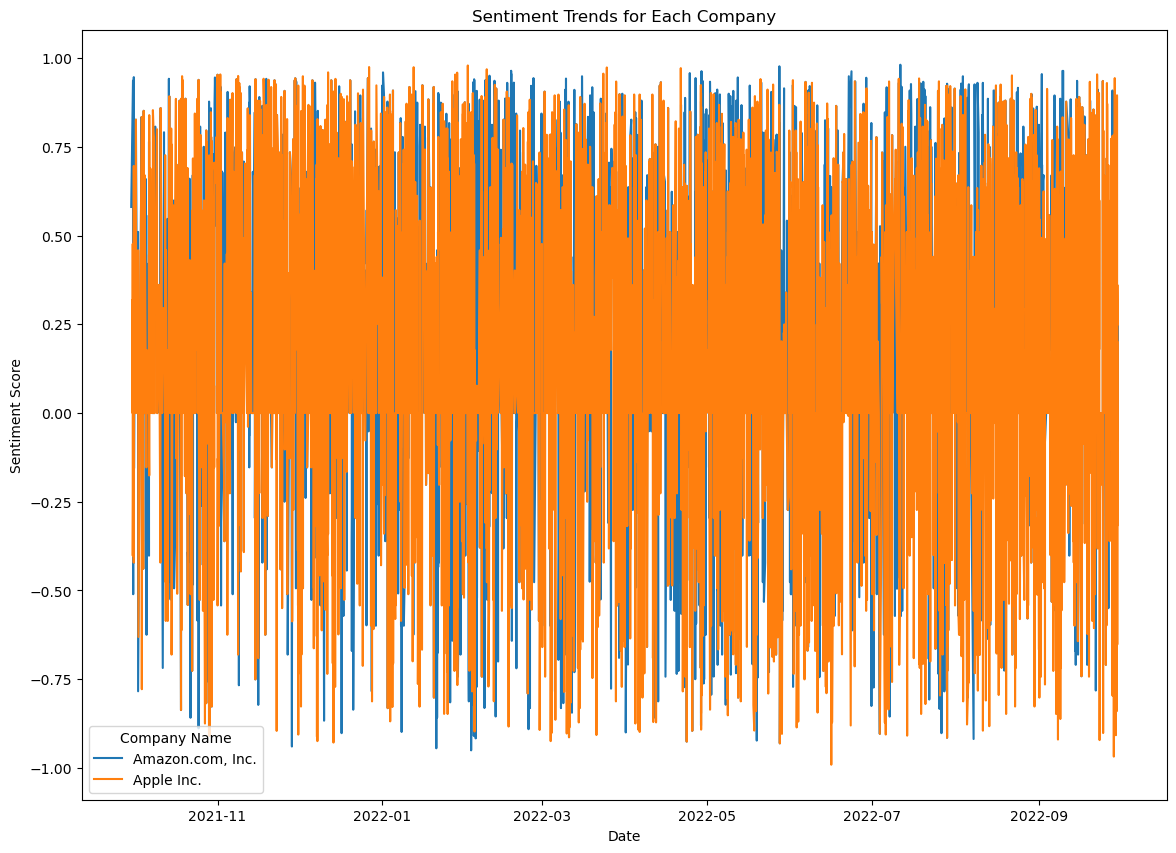

In [238]:
plt.figure(figsize=(14, 10))
sns.lineplot(data=daily_sentiment, x='Date', y='sentiment_score', hue='Company Name')
plt.title('Sentiment Trends for Each Company')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(title='Company Name')
plt.show()


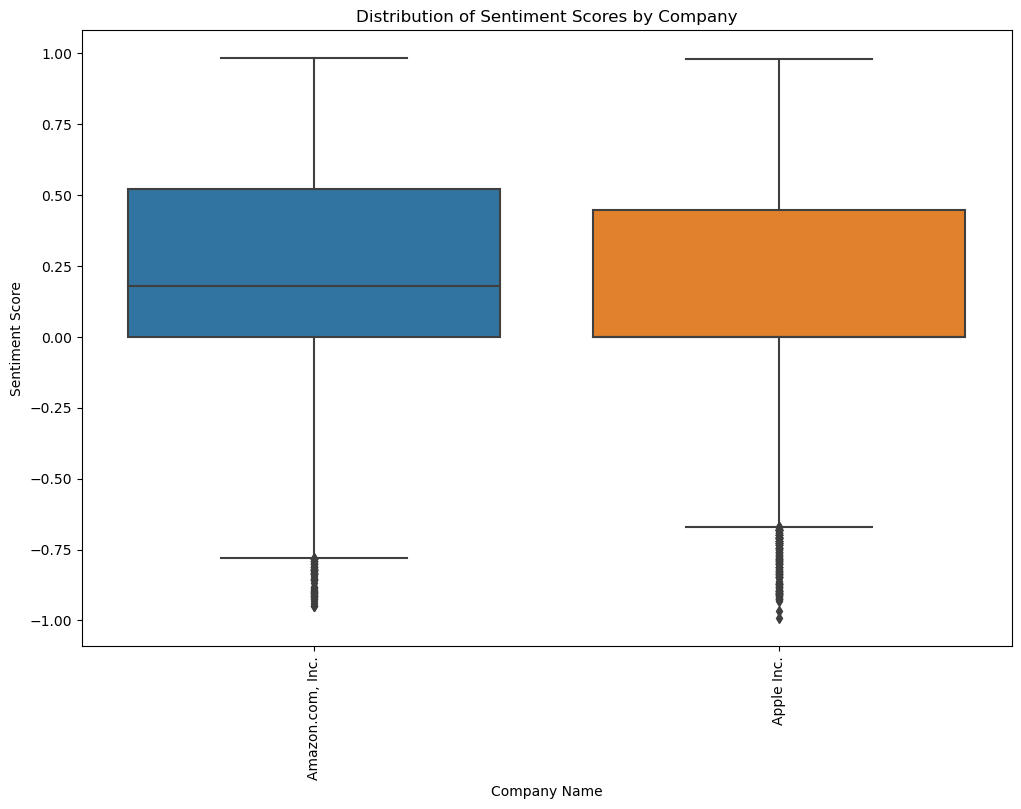

In [239]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Company Name', y='sentiment_score', data=df)
plt.title('Distribution of Sentiment Scores by Company')
plt.xlabel('Company Name')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.show()


<a id="section-five"></a>
# Conclusion

Few insights I gathered from the analysis of the data
- **Amazon** has a slightly higher average sentiment score (0.185) compared to **Apple** (0.136), indicating more positive public sentiment for Amazon.

- Sentiment scores for **Amazon** are more variable (std. dev. 0.432) than for **Apple** (std. dev. 0.417), suggesting greater fluctuations in how people feel about Amazon.

- Both companies experience significant daily and weekly sentiment changes, but Amazon generally has more positive weekly averages compared to Apple.

- Both companies have a broad range of sentiment scores, but Amazon’s range is wider, indicating more extreme reactions from the public.

- Amazon shows a greater spread and stronger reactions in sentiment, while Apple’s sentiment distribution is more concentrated around the median value.